# Prototype an interpolation function for argo floats

The files come in (level, profile) dimensions, but the level can have vastly different pressure. We need to have a way to convert pressure into a dimension via interpolation

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'

Lets open a test file from a BGC argo float

In [15]:
ds = xr.open_dataset('../data/5903711_Mprof.nc', chunks={'N_PROF':-1})

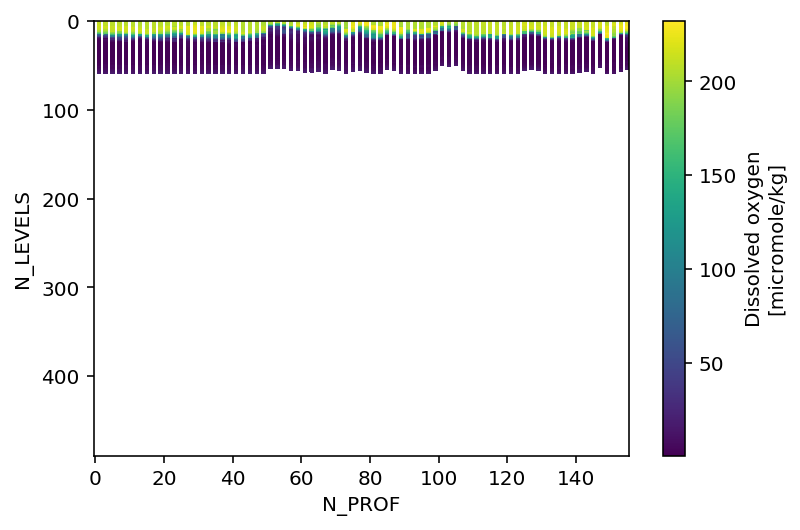

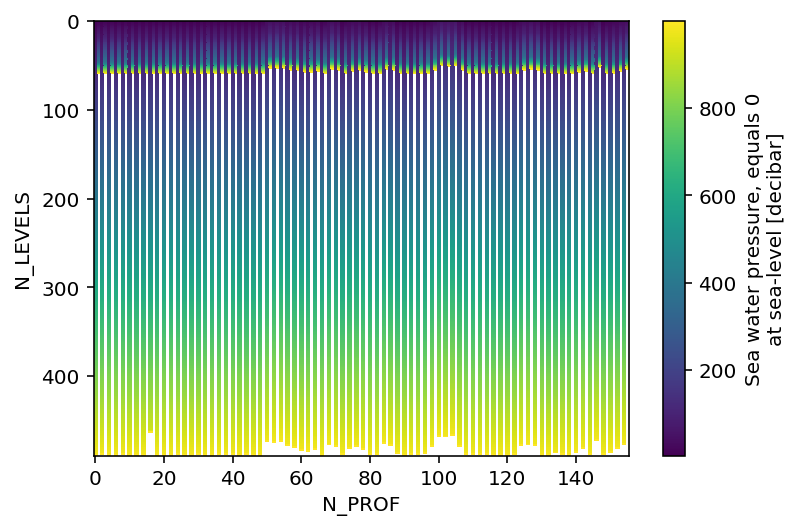

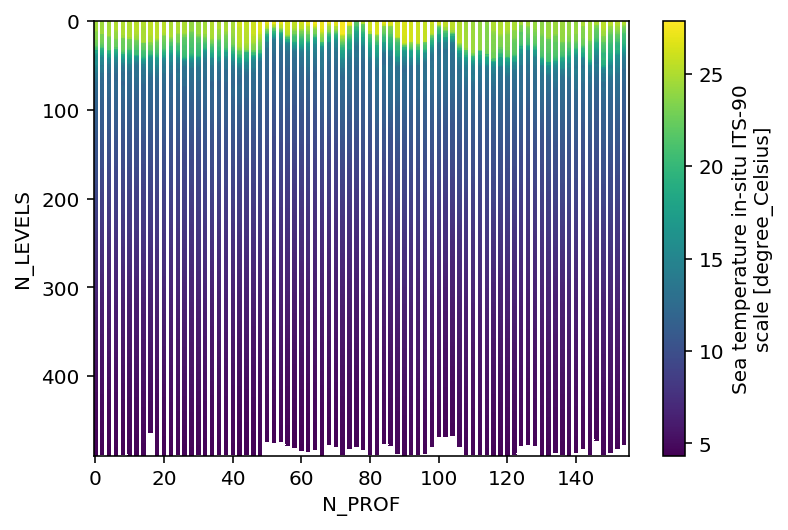

In [16]:
for var in ['DOXY_ADJUSTED', 'PRES_ADJUSTED', 'TEMP_ADJUSTED']:
    plt. figure()
    ds[var].plot(x='N_PROF', yincrease=False)

Note in particular the pressure data. Due to different sampling frequency, we can not even approximately select a pressure slice using the given dimensions. Lets interpolate the dataset onto regularly spaced pressure coordinates

In [17]:
from xargofloat.utils import interpolate_to_pressure

In [18]:
ds_new = interpolate_to_pressure(ds)
ds_new

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 0, N_PARAM: 5, N_PROF: 156, PRESSURE_INTERPOLATED: 1000)
Coordinates:
  * PRESSURE_INTERPOLATED         (PRESSURE_INTERPOLATED) int64 0 2 ... 1998
    remapped_PRES_ADJUSTED        (N_PROF, PRESSURE_INTERPOLATED) float32 dask.array<chunksize=(156, 1000), meta=np.ndarray>
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    PROJECT_NAME                  (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    PI_NAME                       (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    STATION_PARAMETERS            (N_PROF, N_PARAM) object dask.array<chunksize=(156, 5), meta=np.ndarray>
    CYCLE_NUMBER                  (N_PROF) float64 dask.array<chunksize=(156,), meta=np.ndarray>
    DIRECTION                     (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    DATA_CENTRE                   (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    DC_REFERENCE                  (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    DATA_STATE_INDICATOR          (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    DATA_MODE                     (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    PARAMETER_DATA_MODE           (N_PROF, N_PARAM) object dask.array<chunksize=(156, 5), meta=np.ndarray>
    PLATFORM_TYPE                 (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    FLOAT_SERIAL_NO               (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    FIRMWARE_VERSION              (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    WMO_INST_TYPE                 (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    JULD                          (N_PROF) datetime64[ns] dask.array<chunksize=(156,), meta=np.ndarray>
    JULD_LOCATION                 (N_PROF) datetime64[ns] dask.array<chunksize=(156,), meta=np.ndarray>
    LATITUDE                      (N_PROF) float64 dask.array<chunksize=(156,), meta=np.ndarray>
    LONGITUDE                     (N_PROF) float64 dask.array<chunksize=(156,), meta=np.ndarray>
    POSITIONING_SYSTEM            (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    VERTICAL_SAMPLING_SCHEME      (N_PROF) object dask.array<chunksize=(156,), meta=np.ndarray>
    CONFIG_MISSION_NUMBER         (N_PROF) float64 dask.array<chunksize=(156,), meta=np.ndarray>
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object dask.array<chunksize=(156, 1, 5), meta=np.ndarray>
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object dask.array<chunksize=(156, 1, 5), meta=np.ndarray>
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object dask.array<chunksize=(156, 1, 5), meta=np.ndarray>
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object dask.array<chunksize=(156, 1, 5), meta=np.ndarray>
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CALIB, N_PARAM) object dask.array<chunksize=(156, 1, 5), meta=np.ndarray>
    HISTORY_INSTITUTION           (N_HISTORY, N_PROF) object dask.array<chunksize=(0, 156), meta=np.ndarray>
    HISTORY_STEP                  (N_HISTORY, N_PROF) object dask.array<chunksize=(0, 156), meta=np.ndarray>
    HISTORY_SOFTWARE              (N_HISTORY, N_PROF) object dask.array<chunksize=(0, 156), meta=np.ndarray>
    HISTORY_SOFTWARE_RELEASE      (N_HISTORY, N_PROF) object dask.array<chunksize=(0, 156), meta=np.ndarray>
    HISTORY_REFERENCE             (N_HISTORY, N_PROF) object dask.array<chunksize=(0, 156), meta=np.ndarray>
    HISTORY_DATE                  (N_HISTORY, N_PROF) object dask.array<chunksize=(0, 156

We can now plot against the new dimension `PRESSURE_INTERPOLATED`. Additionally we can now interpolate across the profiles(`.interpolate_na('N_PROF')`), to eliminate the missing columns. Furthermore it is now trivial to plot against time instead of profile number by passging `x='JULD'`.

/Users/juliusbusecke/miniconda/envs/xargofloat/lib/python3.8/site-packages/xarray/core/missing.py:319: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  arr = apply_ufunc(
/Users/juliusbusecke/miniconda/envs/xargofloat/lib/python3.8/site-packages/xarray/core/missing.py:319: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  arr = apply_ufunc(
/Users/juliusbusecke/miniconda/envs/xargofloat/lib/python3.8/site-packages/xarray/core/missing.py:319: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  arr = apply_ufunc(
/Users/juliusbusecke/miniconda/envs/xargofloat/lib/python3.8/site-packages/xarray/core/missing.py:319: Future

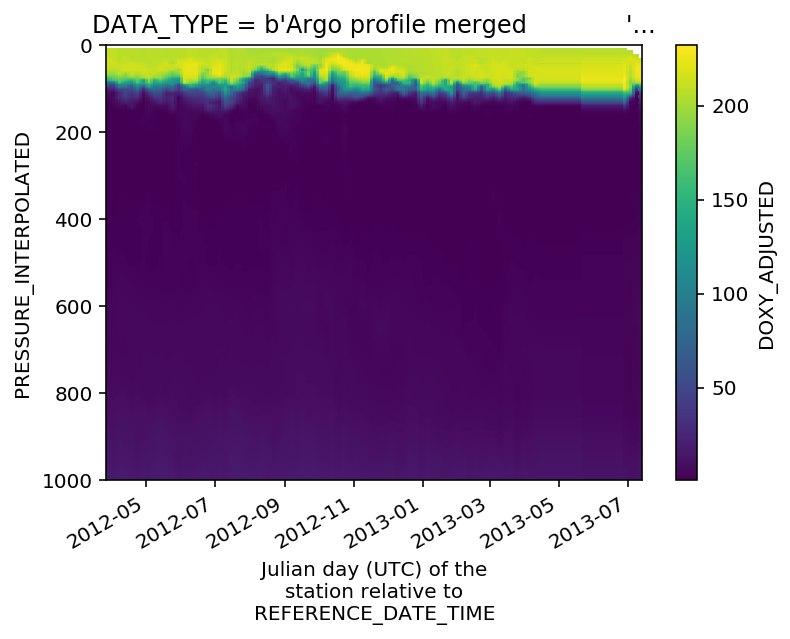

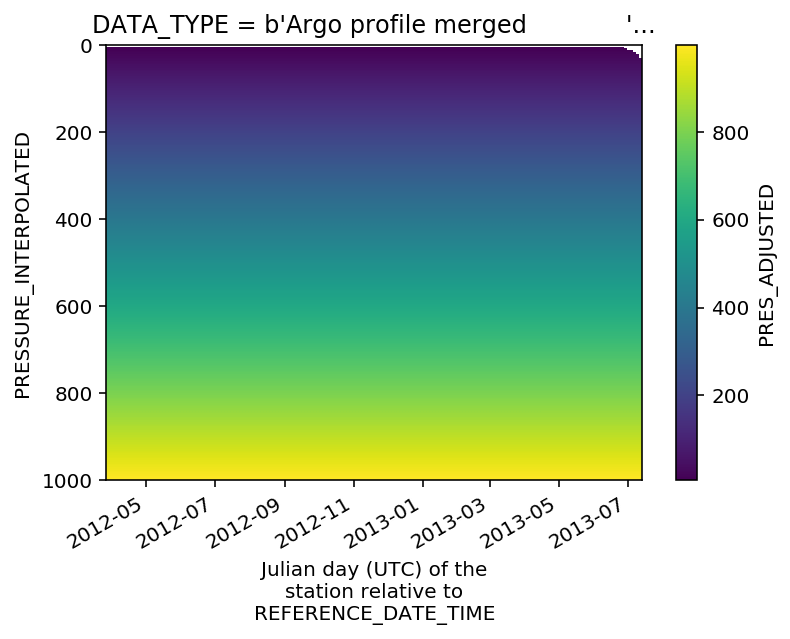

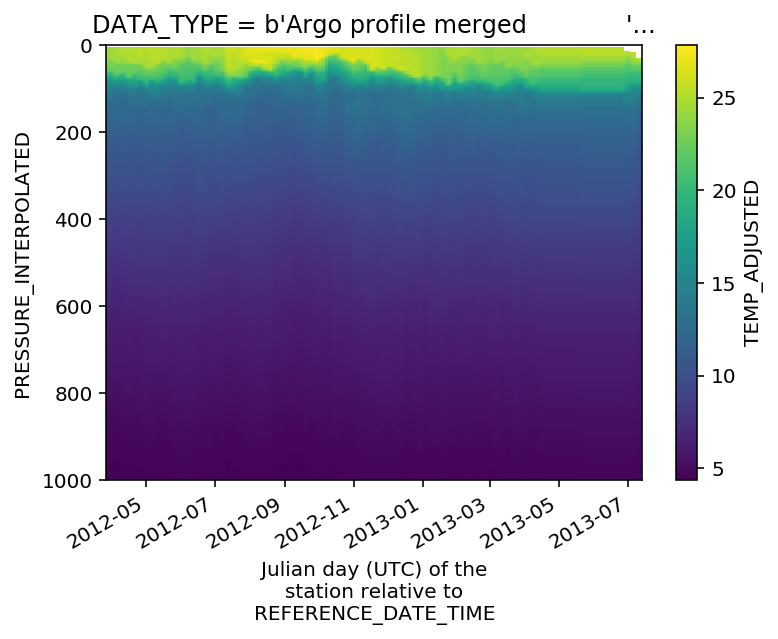

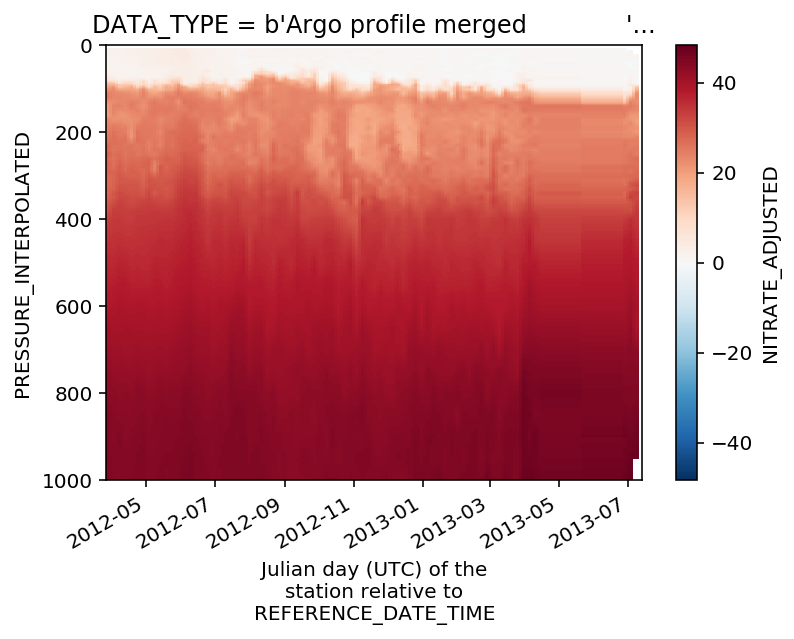

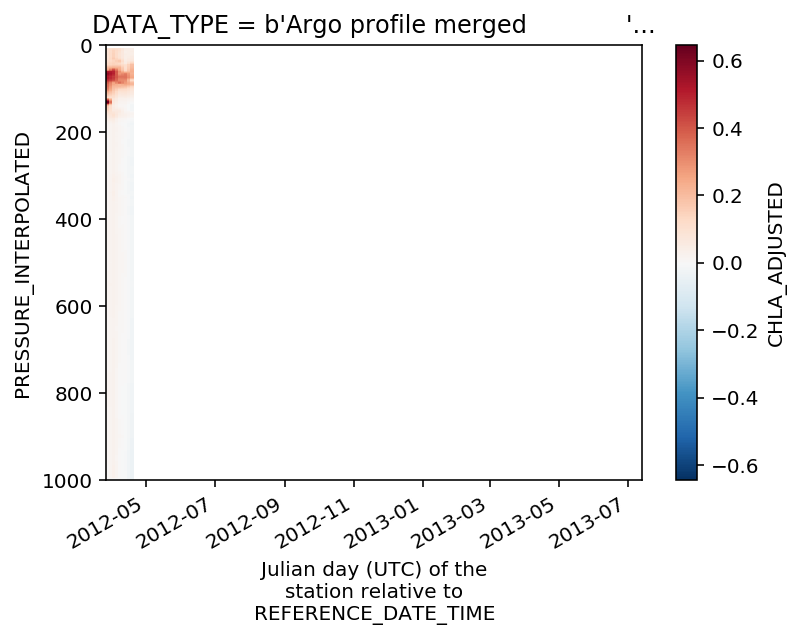

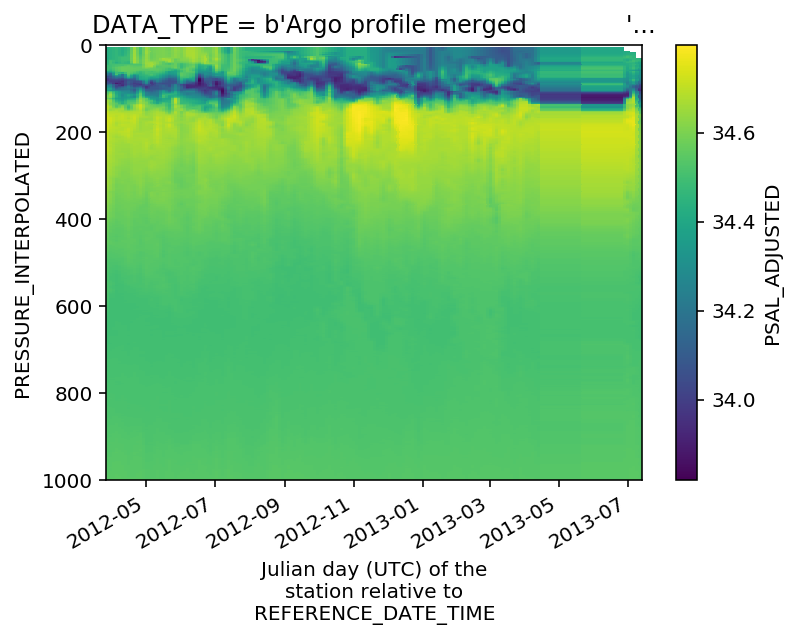

In [20]:
for var in ['DOXY_ADJUSTED', 'PRES_ADJUSTED', 'TEMP_ADJUSTED', 'NITRATE_ADJUSTED', 'CHLA_ADJUSTED', 'PSAL_ADJUSTED']:
    plt. figure()
    ds_new[var].interpolate_na('N_PROF').plot(x='JULD', yincrease=False)
    plt.ylim([1000, 0])

The pressure field now corresponds to the interpolated pressure, just like expected. This is a lot better! 